In [192]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
np.random.seed(1)

In [194]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [195]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [196]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [197]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [198]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [199]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [200]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

In [201]:
def derivative_w1_tanh(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * (1-Z*Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [202]:
def derivative_b1_tanh(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * (1-Z*Z)).sum(axis=0)

In [203]:
def derivative_w1_relu(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * (Z > 0)
    ret2 = X.T.dot(dZ)
    return -ret2

In [204]:
def derivative_b1_relu(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * (Z > 0)).sum(axis=0)

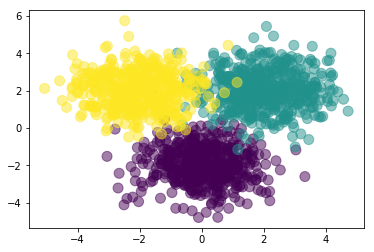

In [205]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# randomly initialize weights
w1 = np.random.randn(D, M)
B1 = np.random.randn(M)
w2 = np.random.randn(M, K)
B2 = np.random.randn(K)

('cost:', 3147.180844402328, 'classification_rate:', 0.26866666666666666)
('cost:', 141.97075097237766, 'classification_rate:', 0.9673333333333334)
('cost:', 123.26725832918534, 'classification_rate:', 0.9686666666666667)
('cost:', 118.83941596682905, 'classification_rate:', 0.9686666666666667)
('cost:', 116.9091029167447, 'classification_rate:', 0.9686666666666667)
('cost:', 115.79062755420196, 'classification_rate:', 0.9693333333333334)
('cost:', 115.03007049303264, 'classification_rate:', 0.9693333333333334)
('cost:', 114.45935430430393, 'classification_rate:', 0.97)
('cost:', 114.00283541809502, 'classification_rate:', 0.97)
('cost:', 113.62188120407879, 'classification_rate:', 0.97)


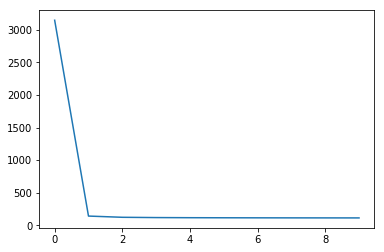

In [206]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_sig = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_sig.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_sig)
plt.show()

('cost:', 3147.180844402328, 'classification_rate:', 0.26866666666666666)
('cost:', 287.0789754270324, 'classification_rate:', 0.9493333333333334)
('cost:', 260.363255646372, 'classification_rate:', 0.954)
('cost:', 249.8091132832972, 'classification_rate:', 0.9566666666666667)
('cost:', 242.32738623811582, 'classification_rate:', 0.9593333333333334)
('cost:', 238.91469403790256, 'classification_rate:', 0.9593333333333334)
('cost:', 236.48597938836522, 'classification_rate:', 0.96)


C:\Users\hongj\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


('cost:', 231.76899161053717, 'classification_rate:', 0.962)
('cost:', 231.9903666616553, 'classification_rate:', 0.962)
('cost:', 237.42086590503004, 'classification_rate:', 0.9606666666666667)


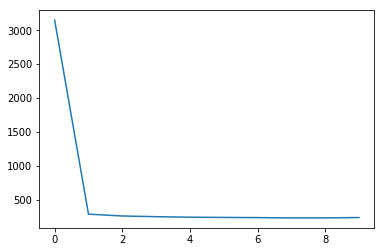

In [207]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_tanh = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_tanh.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_tanh(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_tanh(T, output, W2, hidden)

plt.plot(costs_tanh)
plt.show()

('cost:', 3147.180844402328, 'classification_rate:', 0.26866666666666666)
('cost:', 216.33907859872048, 'classification_rate:', 0.9666666666666667)
('cost:', 219.87693293705536, 'classification_rate:', 0.9633333333333334)
('cost:', 233.0386374944713, 'classification_rate:', 0.962)
('cost:', 237.70230402728305, 'classification_rate:', 0.9606666666666667)
('cost:', 238.52261535271356, 'classification_rate:', 0.96)
('cost:', 227.2165550705833, 'classification_rate:', 0.9626666666666667)
('cost:', 235.1476317003623, 'classification_rate:', 0.9606666666666667)


C:\Users\hongj\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


('cost:', 223.6357315801599, 'classification_rate:', 0.962)
('cost:', 219.69175017044813, 'classification_rate:', 0.9633333333333334)


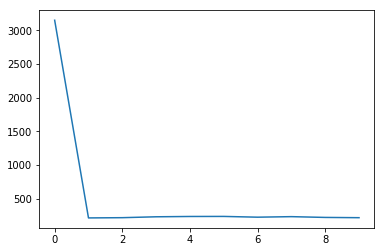

In [208]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_relu = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_relu.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_relu(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_relu(T, output, W2, hidden)

plt.plot(costs_relu)
plt.show()

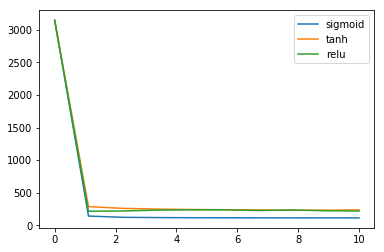

In [209]:
x1 = np.linspace(0, 10, len(costs_sig))
plt.plot(x1, costs_sig, label="sigmoid")
x2 = np.linspace(0, 10, len(costs_tanh))
plt.plot(x2, costs_tanh, label="tanh")
x3 = np.linspace(0, 10, len(costs_relu))
plt.plot(x3, costs_relu, label="relu")
plt.legend()
plt.show()